In [3]:
# certifique-se de ter o arquivo nuvem20231111FINAL.txt (salvo no formato CSV no excel) no diretorio corrente:

# method;8;9878
# data;9;8554
# image;10;8349
# information;11;8297
# drawing;12;7265
# network;14;6501
# model;15;6288
# based;17;5650
# description;21;4564


# instale:

#!pip install spacy
#!pip install wordcloud
#!pip install matplotlib
#!python -m spacy download en_core_web_sm


import random

frequencia_palavras = {}
with open('patentometria-nuvem-2024.txt', 'r') as arquivo:
    for linha in arquivo:
        partes = linha.strip().split(';')
        if len(partes) == 3:
            palavra = partes[0]
            quantidade = int(partes[2])
            if palavra in frequencia_palavras:
                frequencia_palavras[palavra] += quantidade
            else:
                frequencia_palavras[palavra] = quantidade

# Converta o dicionário em uma lista de tuplas (palavra, frequência)
frequencia_lista = [(palavra, frequencia) for palavra, frequencia in frequencia_palavras.items()]

# Ordene a lista de frequência com base na frequência (do maior para o menor)
frequencia_lista.sort(key=lambda x: x[1], reverse=True)

# Exiba a lista de frequência
for palavra, frequencia in frequencia_lista:
    print(f'{palavra}: {frequencia}')

# Inicialize uma lista para armazenar as palavras repetidas
palavras_repetidas = []

# Crie a lista de palavras repetidas com base na frequência
for palavra, frequencia in frequencia_palavras.items():
    k = int(frequencia/3)
    palavras_repetidas.extend([palavra] * k)
    
# embaralhar a lista palavras repetidas
random.shuffle(palavras_repetidas)

# Crie uma string juntando as palavras repetidas
text = ' '.join(palavras_repetidas)

# print(text)

information: 755
label: 402
method: 329
data: 291
model: 261
training: 181
image: 171
learning: 169
based: 138
set: 130
target: 128
text: 110
device: 108
classification: 100
index: 99
network: 96
drawing: 82
involves: 78
result: 71
step: 70
sample: 69
labeling: 68
obtained: 68
second: 66
flow: 62
neural: 61
obtain: 59
object: 57
machine: 55
feature: 52
system: 52
unit: 51
illustrating: 50
computer: 49
enables: 49
storage: 49
that: 47
diagram: 46
medium: 44
generating: 43
artificial: 40
input: 39
recognition: 38
picture: 37
supervised: 37
accuracy: 36
evaluation: 36
medical: 36
program: 36
prediction: 34
deep: 33
trained: 33
determined: 32
determining: 32
electronic: 31
identification: 31
management: 31
process: 31
area: 30
following: 29
storing: 29
attribute: 28
generated: 28
intelligence: 28
multiple: 28
performed: 28
performing: 28
preset: 28
value: 28
content: 27
detection: 27
instructions: 27
level: 27
service: 27
terminal: 27
apparatus: 26
models: 26
comprises: 25
category: 24
pro

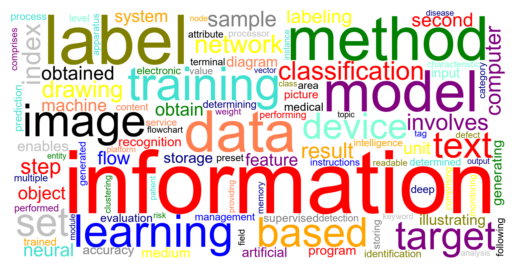

In [9]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.pt.stop_words import STOP_WORDS

#elimine stop words em inglês
nlp = spacy.load("en_core_web_sm")
#nlp = spacy.load("pt_core_news_sm")
doc = nlp(text)
palavras_sem_stop_words = [token.text for token in doc if not token.is_stop]
texto = " ".join(palavras_sem_stop_words)

# Crie a nuvem de palavras
wordcloud = WordCloud(
    background_color='white', 
    font_path='arial.ttf', 
    width=2000, 
    height=1000, 
    collocations=False,  # Desativa a combinação de palavras
    random_state=42      # Define um estado aleatório para as cores
).generate(texto)

# Defina um esquema de cores personalizado (exemplo: vermelho, verde e azul)
colors = ["red", "green", "blue", "black", "yellow", "orange", "gray", "navy", "purple", "navy", "olive", "turquoise", "coral", "aquamarine", "silver"]

# Crie uma imagem de array de cores com base na nuvem de palavras
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(colors)

wordcloud = WordCloud(
    background_color='white',
    font_path='arial.ttf',
    width=2000,
    height=1000,
    collocations=False,
    random_state=42
).generate(texto)
wordcloud.recolor(color_func=color_func)  # Aplica o esquema de cores personalizado

# Exiba a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()